In [1]:
#Importing Libraries
import numpy as np 
import pandas as pd 
from sklearn import datasets
from sklearn.cluster import KMeans

In [2]:
dataset=datasets.load_breast_cancer()
dataset

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [3]:
print(dataset.data.shape)
print(dataset.target.shape)

(569, 30)
(569,)


In [4]:
kmeans = KMeans(n_clusters=10, random_state=92)
prediction = kmeans.fit_predict(dataset.data)
prediction

array([9, 9, 1, 5, 1, 0, 1, 0, 0, 0, 8, 6, 6, 8, 0, 8, 8, 6, 4, 0, 5, 2,
       8, 4, 9, 6, 0, 6, 6, 6, 1, 0, 6, 9, 6, 6, 0, 5, 0, 0, 0, 5, 1, 0,
       0, 1, 2, 0, 5, 0, 5, 0, 5, 6, 8, 5, 9, 8, 5, 2, 2, 2, 8, 2, 0, 8,
       2, 5, 2, 5, 9, 2, 1, 0, 5, 6, 5, 1, 1, 5, 5, 5, 3, 6, 5, 1, 0, 1,
       5, 0, 0, 0, 0, 0, 8, 9, 5, 2, 5, 0, 0, 2, 5, 2, 2, 0, 5, 5, 4, 5,
       2, 5, 0, 2, 2, 5, 2, 8, 6, 6, 5, 1, 4, 0, 5, 0, 0, 1, 0, 1, 5, 8,
       6, 8, 1, 5, 5, 5, 8, 2, 2, 6, 5, 5, 2, 5, 5, 0, 0, 0, 5, 2, 2, 2,
       0, 5, 6, 8, 5, 5, 5, 1, 4, 5, 4, 0, 2, 6, 1, 0, 5, 8, 8, 2, 2, 2,
       2, 8, 5, 5, 3, 9, 6, 5, 8, 2, 6, 5, 5, 5, 0, 5, 2, 0, 0, 5, 0, 6,
       1, 8, 5, 6, 4, 8, 5, 8, 2, 6, 5, 8, 1, 5, 3, 8, 0, 0, 5, 2, 9, 4,
       0, 0, 2, 8, 0, 0, 2, 0, 5, 0, 6, 5, 5, 9, 2, 0, 3, 9, 0, 6, 0, 5,
       5, 0, 1, 2, 5, 5, 2, 5, 9, 5, 9, 6, 9, 0, 9, 8, 6, 8, 9, 6, 6, 8,
       6, 3, 2, 0, 5, 2, 0, 5, 4, 2, 6, 5, 5, 6, 0, 0, 1, 5, 1, 8, 5, 5,
       5, 5, 2, 5, 0, 0, 5, 5, 5, 0, 2, 5, 0, 2, 9,

In [5]:
kmeans.cluster_centers_.shape


(10, 30)

In [6]:
import numpy as np
from scipy.stats import mode
labels = np.zeros_like(prediction)
for i in range(10):
  mask = (prediction == i)
  labels[mask] = mode(dataset.target[mask])[0]

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(dataset.target, labels)

0.9086115992970123

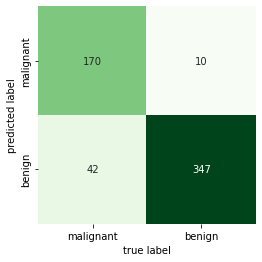

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(dataset.target, labels)
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=dataset.target_names,yticklabels=dataset.target_names,cmap='Greens')

#ax.set_ylim(10,10)
plt.xlabel('true label')
plt.ylabel('predicted label');